# Tools And Techniques In Data Science
## Course Code: DS-5023
## Lab: 6
## Instructor: Mr. Faisal Asad ur Rehman

# --------------------------------------------------------------------------

# Visualization

## Outline

* Aesthetics
 * Backgrounds
 * Scaling
 * Labels & Titles
 * Grids
* Distribution of Data
 * Univariate
 * Bivariate
 * Pairwise Bivariate
* Plotting Categorical data
 * Swarm plots
 * Boxplots
 * Violin plots
 * Bar plots
 * Factor plots
 * Heatmap

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()
%matplotlib inline

# Part 1

In [2]:
data = pd.read_csv('F:\\iris.csv')
df = data.copy()
print(df.shape)
df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Aesthetics

In [3]:
def sinplot(flip=2):
    x = np.linspace(0, 14, 50)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

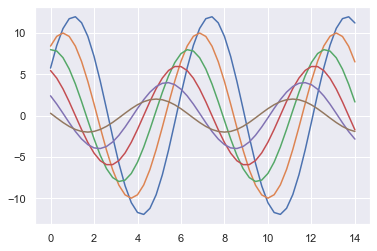

In [4]:
sinplot()

### Backgrounds

**White Grid**

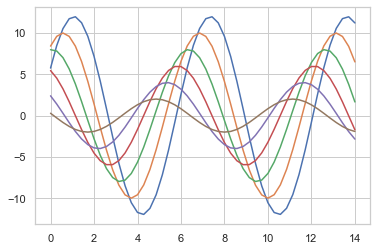

In [5]:
sns.set_style("whitegrid")
sinplot()


**Dark Grid**

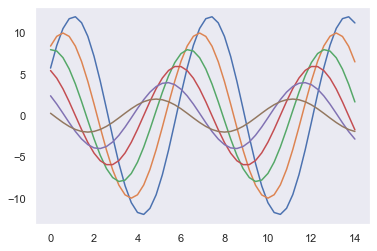

In [6]:
sns.set_style("dark")
sinplot()

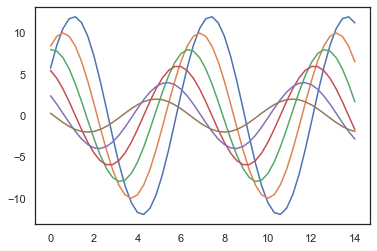

In [7]:
sns.set_style("white")
sinplot()

**Adding ticks to the axes**

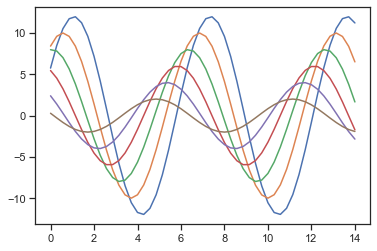

In [8]:
sns.set_style("ticks")
sinplot()

### Scaling

**Figure Size**

Figure(720x288) AxesSubplot(0.125,0.125;0.775x0.755)


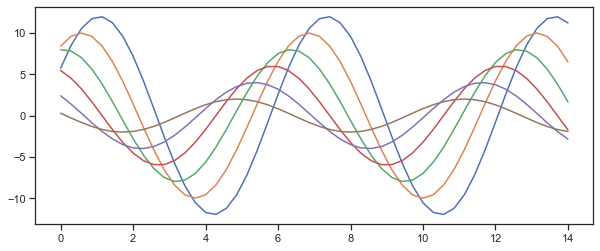

In [9]:
fig, ax = plt.subplots(figsize=(10,4))
print(fig,ax)
sinplot()

A separate set of parameters control the scale of plot elements, which should let you use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

The four preset contexts, in order of relative size, are `paper`, `notebook`, `talk`, and `poster`. The `notebook` style is the default, and was used in the plots above.

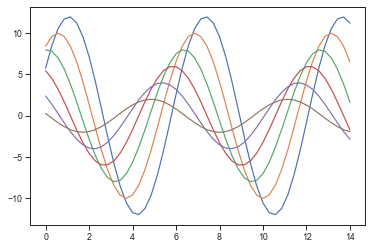

In [10]:
sns.set_context("paper")
sinplot()

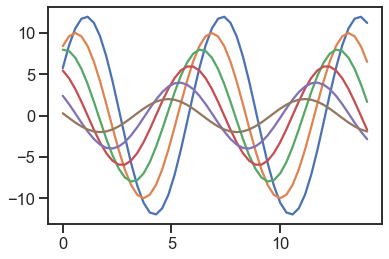

In [11]:
sns.set_context("talk")
sinplot()

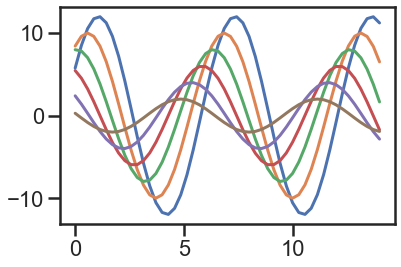

In [12]:
sns.set_context("poster")
sinplot()

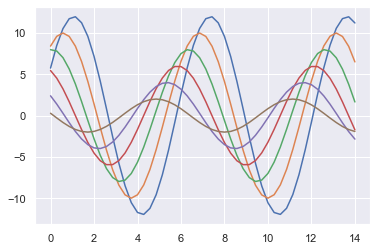

In [13]:
sns.set()
sinplot()

### Labels & Title

**Labels**

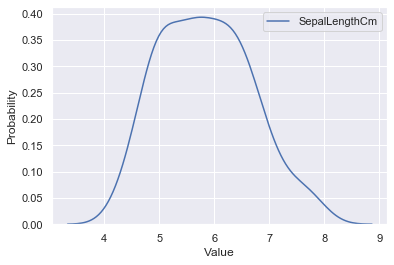

In [14]:
ax = sns.kdeplot(df['SepalLengthCm'])
ax.set(xlabel='Value', ylabel='Probability');

**Title**

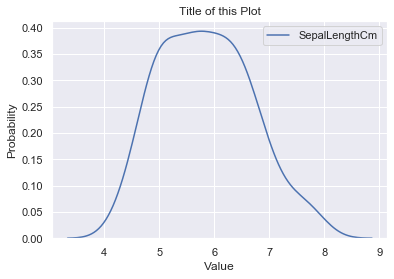

In [15]:
ax = sns.kdeplot(df['SepalLengthCm'])
ax.set_title('Title of this Plot');
ax.set(xlabel='Value', ylabel='Probability');

### Grids

**Using Matplotlib**

Subplots can be created explicitly on a figure using `subplots(rows, columns, sharex=bool, sharey=bool)`, all at once. It returns a figure and an array of axes of order rows x columns. This array can be used to plot on a specific subplot.

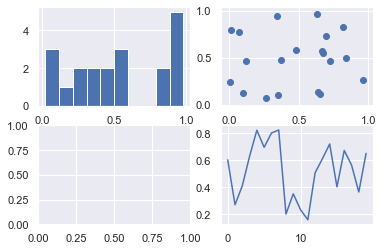

In [16]:
fig, ax = plt.subplots(2,2)
ax[0,0].hist(np.random.rand(20));
ax[0,1].scatter(np.random.rand(20), np.random.rand(20));
ax[1,1].plot(np.random.rand(20));

## Distribution of Data

### Univariate

**Histogram & KDE (Kernel Density Estimate)**

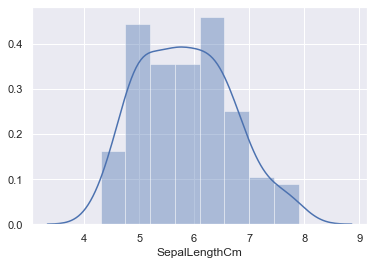

In [17]:
sns.distplot(df['SepalLengthCm']);

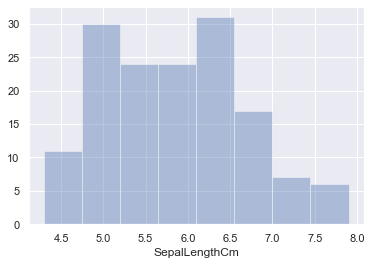

In [18]:
sns.distplot(df['SepalLengthCm'], kde=False);

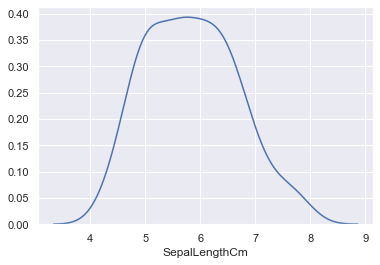

In [19]:
sns.distplot(df['SepalLengthCm'], hist=False);

The bandwidth (bw) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:

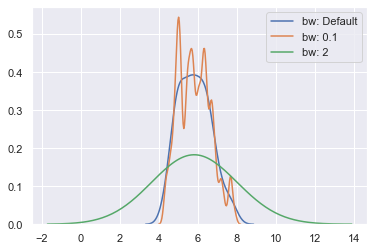

In [20]:
sns.kdeplot(df['SepalLengthCm'], label="bw: Default")
sns.kdeplot(df['SepalLengthCm'], bw=.1, label="bw: 0.1")
sns.kdeplot(df['SepalLengthCm'], bw=2, label="bw: 2")
plt.legend();

**Histogram with rugplot**

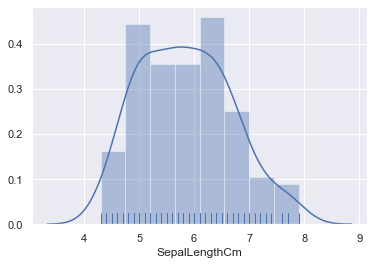

In [21]:
sns.distplot(df['SepalLengthCm'], rug=True);

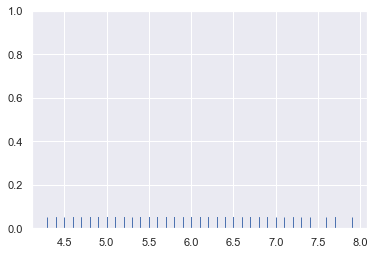

In [22]:
sns.rugplot(df['SepalLengthCm']);

### Bivariate

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the `jointplot()` function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

**Scatterplots ( ~ rugplots in 2D )**

`Jointplot()` (Joint distribution plots) defaults to a scatterplot.

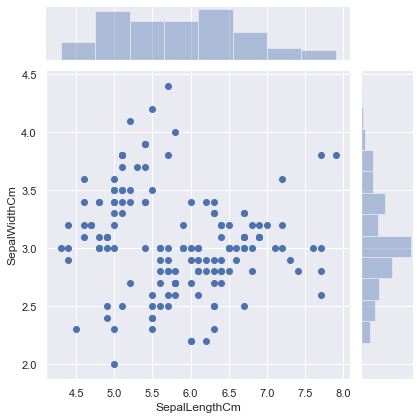

In [23]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df);

___Magic___

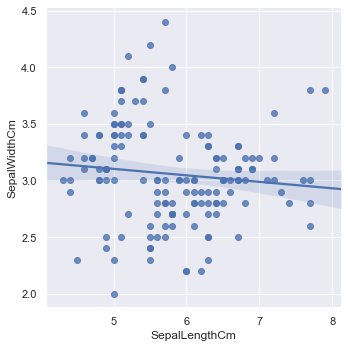

In [24]:
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=df);

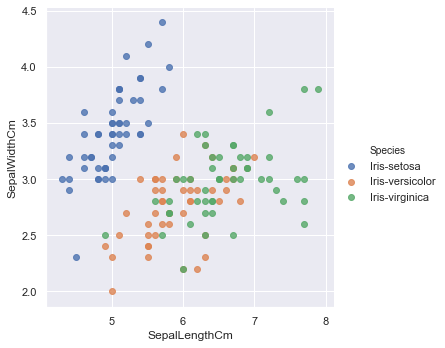

In [25]:
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=df, fit_reg=False, hue='Species');

In [26]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**Contours ( ~ KDE in 2D )**

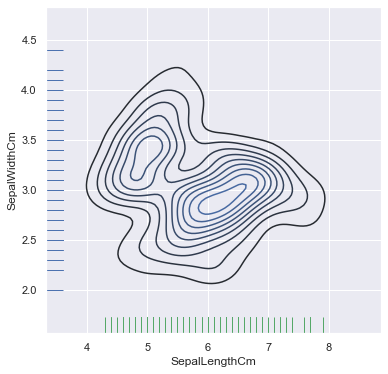

In [27]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.SepalLengthCm, df.SepalWidthCm, ax=ax)
sns.rugplot(df.SepalLengthCm, color="g", ax=ax)
sns.rugplot(df.SepalWidthCm, vertical=True, ax=ax);

### Pairwise Bivariate

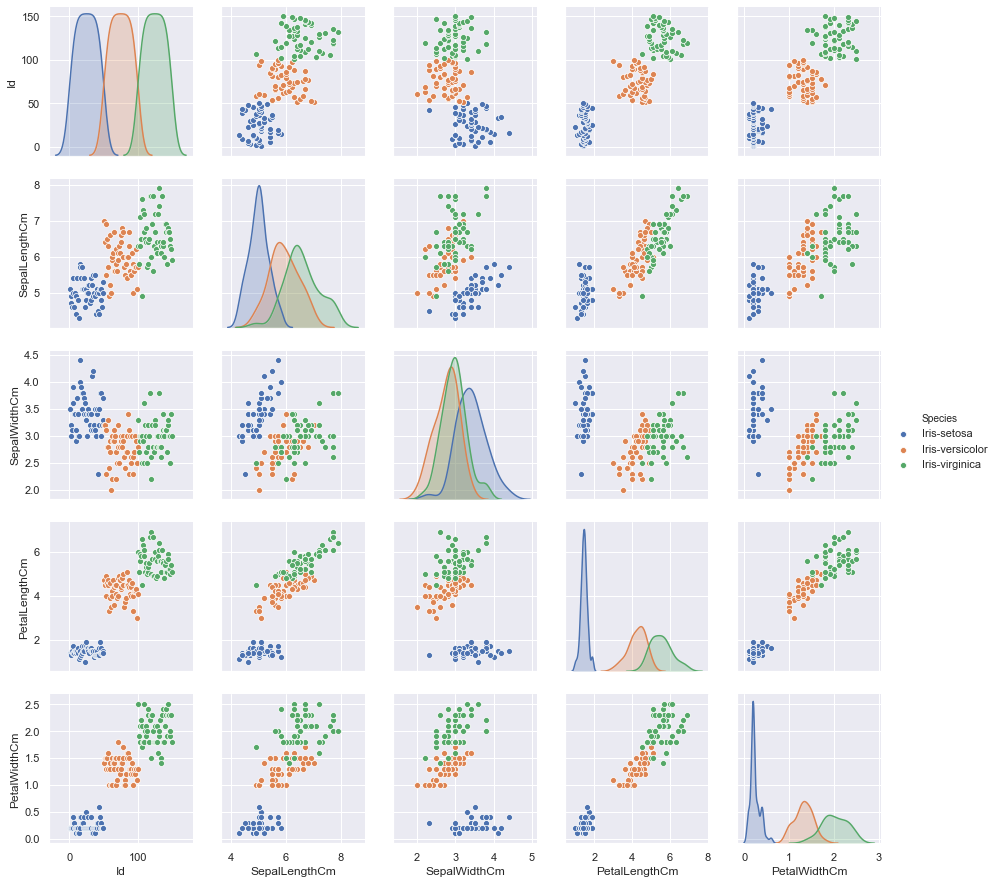

In [28]:
sns.pairplot(df, hue='Species');

### Boxplots

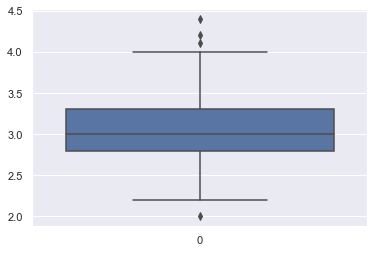

In [29]:
sns.boxplot(data=df['SepalWidthCm']);

In [30]:
sns.boxplot(data =df.drop('id', axis = 1));

KeyError: "['id'] not found in axis"

In [ ]:
sns.boxplot(data=df);

In [ ]:
sns.boxplot(data=df.drop('Id', axis=1));

## Categorical Data

### Swarm Plots

In [ ]:
sns.swarmplot(data=df.drop('Id', axis=1), x='Species', y='SepalWidthCm');

### Box plots

In [ ]:
sns.boxplot(data=df.drop('Id', axis=1), x='Species', y='SepalWidthCm');

In [ ]:
sns.boxplot(data=df.drop('Id', axis=1), x='Species', y='PetalLengthCm');

### Voilin Plots

In [ ]:
sns.violinplot(data=df.drop('Id', axis=1), x='Species', y='SepalWidthCm');

In [ ]:
sns.violinplot(data=df.drop('Id', axis=1), x='Species', y='SepalWidthCm', inner=None);
sns.swarmplot(data=df.drop('Id', axis=1), x='Species', y='SepalWidthCm', alpha=0.7, color='k');

### Bar Plots

In [ ]:
sns.countplot(x='Species', data=df);

In [ ]:
sns.countplot(x='Species', data=df);
plt.xticks(rotation=-45);

In [ ]:
sns.countplot(y='Species', data=df);
plt.yticks(rotation=45);

### Factor Plots

In [ ]:
g = sns.factorplot(x='PetalWidthCm', y='PetalLengthCm', data=df, hue ='Species', col='Species', kind='swarm');

In [ ]:
g = sns.factorplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue ='Species', col='Species', kind='swarm');

In [ ]:
g = sns.factorplot(x='PetalWidthCm', y='PetalLengthCm', data=df, hue ='Species', col='Species', kind='swarm', size=5);

In [ ]:
g = sns.factorplot(x='PetalWidthCm', y='PetalLengthCm', data=df, hue='Species', row='Species', kind='swarm');

### Heatmap

In [ ]:
cor = df.corr()
sns.heatmap(cor, annot=True);

# Part 2

In [ ]:
data = pd.read_csv('C:\\Users\\User\\Desktop\\Labs Tools and Techniques\\Lab 6\\train.csv')
df = data.copy()

### Basic Structure

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
df.describe(include=["O"])

In [ ]:
df.describe(include='all')

### Completeness

In [ ]:
df.isnull().sum()

## 3. Exploration

### 3.1 Exploration of Complete & Important Variables

Our response variable in the training set is complete, as well as Sex and Pclass, which seem two of the most important predictors.

**Survival**

In [ ]:
sns.countplot(x='Survived', hue='Survived', data=df);

**Gender & Survival**

In [ ]:
sns.countplot(x='Sex', data=df);

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df);

**Passenger Class & Survival**

In [ ]:
sns.countplot(x='Pclass', data=df);

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df);

**Passenger Class, Gender & Survival**

In [ ]:
sns.factorplot(x='Sex', col='Pclass', hue='Survived', data=df, kind='count');

### 3.2 What's in the name?

In [ ]:
df['Name'].head(10)

**Extracting & Analyzing Titles**

In [ ]:
df['Title'] = df['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
df.head()

In [ ]:
df['Title'].value_counts()

___Dividing Titles into bigger categories___

The term *Mademoiselle* is a French familiar title, abbreviated **Mlle**, traditionally given to an unmarried woman. The equivalent in English is "Miss". However, the courtesy title "Madame" is accorded women where their marital status is unknown.

In [ ]:
df['Title'] = df['Title'].replace('Mlle', 'Miss')

In France, one traditionally calls a young, unmarried woman Mademoiselle – Mlle for short – and an older, married woman _Madame_, whose abbreviation is **Mme**.

In [ ]:
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [ ]:
i = df[~df['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])].index
df.loc[i, 'Title'] = 'Rare Title'

In [ ]:
df['Title'].unique()

In [ ]:
sns.countplot(x='Title', hue='Survived', data=df);

### 3.3 Travelling Alone vs. Travelling in groups

**3.3.1 Family Size**

In [ ]:
df['Fsize'] = df['SibSp'] + df['Parch']+1

In [ ]:
sns.countplot(x='Fsize', hue='Survived', data=df);

In [ ]:
temp = df.groupby('Fsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')
plt.figure(figsize=(15,6));
plt.subplot(121)
sns.barplot(x='Fsize', y='Perc', hue='Survived', data=temp, dodge=True);
plt.subplot(122)
sns.barplot(x='Fsize', y='Perc', hue='Survived', data=temp, dodge=False);

**3.3.2 How many people booked together?**

_Apart from families, there could be groups of friends travelling together._

In [ ]:
temp = df['Ticket'].value_counts().reset_index(name='Tsize')
df = df.merge(temp, left_on='Ticket', right_on='index').drop('index', axis=1)
df.head()

In [ ]:
sns.countplot(x='Tsize', hue='Survived', data=df);

In [ ]:
temp = df.groupby('Tsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')
plt.figure(figsize=(15,6));
plt.subplot(121)
sns.barplot(x='Tsize', y='Perc', hue='Survived', data=temp, dodge=True);
plt.subplot(122)
sns.barplot(x='Tsize', y='Perc', hue='Survived', data=temp, dodge=False);
sns.lmplot(x='Tsize',y='Perc',hue='Survived',data=temp);

**3.3.3 Consolidating family & friends**

In [ ]:
df['Group'] = df[['Tsize', 'Fsize']].max(axis=1)

In [ ]:
sns.countplot(x='Group', hue='Survived', data=df);

In [ ]:
df.head()

In [ ]:
df['GrpSize'] = ''
df.loc[df['Group']==1, 'GrpSize'] = df.loc[df['Group']==1, 'GrpSize'].replace('', 'solo')
df.loc[df['Group']==2, 'GrpSize'] = df.loc[df['Group']==2, 'GrpSize'].replace('', 'couple')
df.loc[(df['Group']<=4) & (df['Group']>=3), 'GrpSize'] = df.loc[(df['Group']<=4) & (df['Group']>=3), 'GrpSize'].replace('', 'group')
df.loc[df['Group']>4, 'GrpSize'] = df.loc[df['Group']>4, 'GrpSize'].replace('', 'large group')
df

In [ ]:
sns.countplot(x='GrpSize', order=['solo', 'couple', 'group', 'large group'], hue='Survived', data=df);

### 3.4 Effect of Fare

In [ ]:
df['Fare'].isnull().sum()

In [ ]:
plt.subplots(figsize=(15,6))
sns.distplot(df['Fare']);

In [ ]:
df['Fare'].unique()

In [ ]:
df[df['Fare'] < 0]

In [ ]:
df[df['Fare'] == 0]

In [ ]:
df.loc[(df['Fare'] == 0) & (df['Pclass'] == 1), 'Fare'] = df[df['Pclass'] == 1]['Fare'].mean()
df.loc[(df['Fare'] == 0) & (df['Pclass'] == 2), 'Fare'] = df[df['Pclass'] == 2]['Fare'].mean()
df.loc[(df['Fare'] == 0) & (df['Pclass'] == 3), 'Fare'] = df[df['Pclass'] == 3]['Fare'].mean()

In [ ]:
df['FareCat'] = ''
df.loc[df['Fare']<=10, 'FareCat'] = '0-10'
df.loc[(df['Fare']>10) & (df['Fare']<=25), 'FareCat'] = '10-25'
df.loc[(df['Fare']>25) & (df['Fare']<=40), 'FareCat'] = '25-40'
df.loc[(df['Fare']>40) & (df['Fare']<=70), 'FareCat'] = '40-70'
df.loc[(df['Fare']>70) & (df['Fare']<=100), 'FareCat'] = '70-100'
df.loc[df['Fare']>100, 'FareCat'] = '100+'
df[['Fare', 'FareCat']].head(10)

In [ ]:
df['Fare'].unique()

In [ ]:
sns.countplot(x='FareCat', order=['0-10', '10-25', '25-40', '40-70', '70-100', '100+'], hue='Survived', data=df);

**Does ticket price correspond to group size?**

In [ ]:
sns.lmplot(x='Group', y='Fare', data=df);

In [ ]:
df['FarePP'] = df['Fare']/df['Group']

In [ ]:
sns.distplot(df['FarePP'], kde=False);

### 3.5 Dropping Cabin?

In [ ]:
sns.countplot(x='Cabin', hue='Survived', data=df);

In [ ]:
df['CabinType'] = df['Cabin'].str[0]
sns.countplot(x='CabinType', hue='Survived', data=df);

### 3.6 Effect of Embarked variable

_C = Cherbourg(France), Q = Queenstown(Ireland), S = Southampton(England)_

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=df);

In [ ]:
sns.barplot(x='Embarked', y='Age', hue='Survived', data=df);

In [ ]:
temp = df.groupby('Embarked')['Survived'].value_counts(normalize=True).reset_index(name='Perc')
plt.figure(figsize=(15,6));
plt.subplot(121)
sns.barplot(x='Embarked', y='Perc', hue='Survived', data=temp, dodge=True);
plt.subplot(122)
sns.barplot(x='Embarked', y='Perc', hue='Survived', data=temp, dodge=False);

***Engineered Features***

In [ ]:
df.head(2)

## 4. Missing Values

### 4.1 Age

In [ ]:
sns.kdeplot(df[df['Survived'] == 0]['Age'].dropna(), shade=True);
sns.kdeplot(df[df['Survived'] == 1]['Age'].dropna(), shade=True);

In [ ]:
temp = df[df['Age'].isnull() == False]

In [ ]:
sns.factorplot(kind='violin', x='Age', split='Sex', col='Title', row='Pclass', data=temp);

In [ ]:
for t in df['Title'].unique():
    for p in df['Pclass'].unique():
        df.loc[(df['Title'] == t) & (df['Pclass'] == p) & (df['Age'].isnull()), 'Age'] = df.loc[(df['Title'] == t) & (df['Pclass'] == p), 'Age'].median()

In [ ]:
df['Age'].hist();

In [ ]:
sns.distplot(df['Age'], hist=False);

In [ ]:
sns.kdeplot(df[df['Survived'] == 0]['Age'], shade=True);
sns.kdeplot(df[df['Survived'] == 1]['Age'], shade=True);

In [ ]:
df['Age'].isnull().sum()

In [ ]:
sns.pairplot(df, hue='Survived');

### Contingency Table

In [ ]:
survived_class = pd.crosstab(index=df["Survived"], 
                            columns=df["Title"],
                             margins=True) 
survived_class